In [1]:
!pip install -q ydata-profiling
!pip install -q matplotlib

/bin/bash: /usr/local/bin/pip: /System/Library/Frameworks/Python.framework/Versions/2.7/Resources/Python.app/: bad interpreter: No such file or directory
/bin/bash: /usr/local/bin/pip: /System/Library/Frameworks/Python.framework/Versions/2.7/Resources/Python.app/: bad interpreter: No such file or directory


In [28]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [45]:
df_il = pd.read_pickle('data.pkl')
l = df_il.columns

for i in range(343):
    print(l[i])
# data_filepath = 'https://raw.githubusercontent.com/atharvanaik10/cs498-css/main/data/05b_analysis_file_update.csv'
# df_full = pd.read_csv(data_filepath)

# df_il = df_full[df_full['cocnumber'].str.contains('IL')]
# df_il['pit_tot_pit_hud'] = (df_il['pit_tot_shelt_pit_hud'] + df_il['pit_tot_unshelt_pit_hud'] + df_il['pit_tot_hless_pit_hud'])
# df_il

cocnumber
pit_tot_shelt_pit_hud
pit_tot_unshelt_pit_hud
pit_tot_hless_pit_hud
pit_ind_shelt_pit_hud
pit_ind_unshelt_pit_hud
pit_ind_hless_pit_hud
pit_perfam_shelt_pit_hud
pit_perfam_unshelt_pit_hud
pit_perfam_hless_pit_hud
pit_ind_chronic_hless_pit_hud
pit_perfam_chronic_hless_pit_hud
pit_vet_hless_pit_hud
econ_urb_urbanicity
coctag
panelvar
hou_pol_totalind_hud
hou_pol_totalday_hud
hou_pol_totalexit_hud
hou_pol_numret6mos_hud
hou_pol_numret12mos_hud
hou_pol_fedfundcoc
hou_pol_fund_project
hou_pol_bed_es_hic_hud
hou_pol_bed_oph_hic_hud
hou_pol_bed_psh_hic_hud
hou_pol_bed_rrh_hic_hud
hou_pol_bed_sh_hic_hud
hou_pol_bed_th_hic_hud
hou_pol_perm_bed_hic_hud
hou_pol_temp_bed_hic_hud
dem_pop_pop_census
dem_pop_male_census
dem_pop_female_census
dem_pop_child_census
dem_pop_adult_census
dem_pop_senior_census
dem_soc_white_census
dem_soc_black_census
dem_soc_native_census
dem_soc_asian_census
dem_soc_pacific_census
dem_soc_racetwo_census
dem_soc_hispanic_census
dem_age_boom_census
total_rent_inv

Correlation Matrix

In [39]:
# create numeric columns ad add to dataframe

numeric_columns = df_il.select_dtypes(include=['number']).columns

numeric_columns = numeric_columns[1::]

# Extract numeric data
numeric_data = df_il[numeric_columns]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform only the numeric data
scaled_data_numeric = scaler.fit_transform(numeric_data)

# Replace the scaled numeric values back into the original DataFrame
df_il[numeric_columns] = scaled_data_numeric



In [40]:
# Compute pairwise correlation of columns

correlation_matrix = df_il[numeric_columns].corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                   pit_tot_unshelt_pit_hud  \
pit_tot_unshelt_pit_hud                           1.000000   
pit_tot_hless_pit_hud                             0.503986   
pit_ind_shelt_pit_hud                             0.252590   
pit_ind_unshelt_pit_hud                           0.875802   
pit_ind_hless_pit_hud                             0.462683   
pit_perfam_shelt_pit_hud                          0.339696   
pit_perfam_unshelt_pit_hud                        0.690286   
pit_perfam_hless_pit_hud                          0.443038   
pit_ind_chronic_hless_pit_hud                     0.389986   
pit_perfam_chronic_hless_pit_hud                  0.427909   
pit_vet_hless_pit_hud                             0.258187   
econ_urb_urbanicity                              -0.039115   
coctag                                                 NaN   
panelvar                                          0.101782   
hou_pol_totalind_hud                              

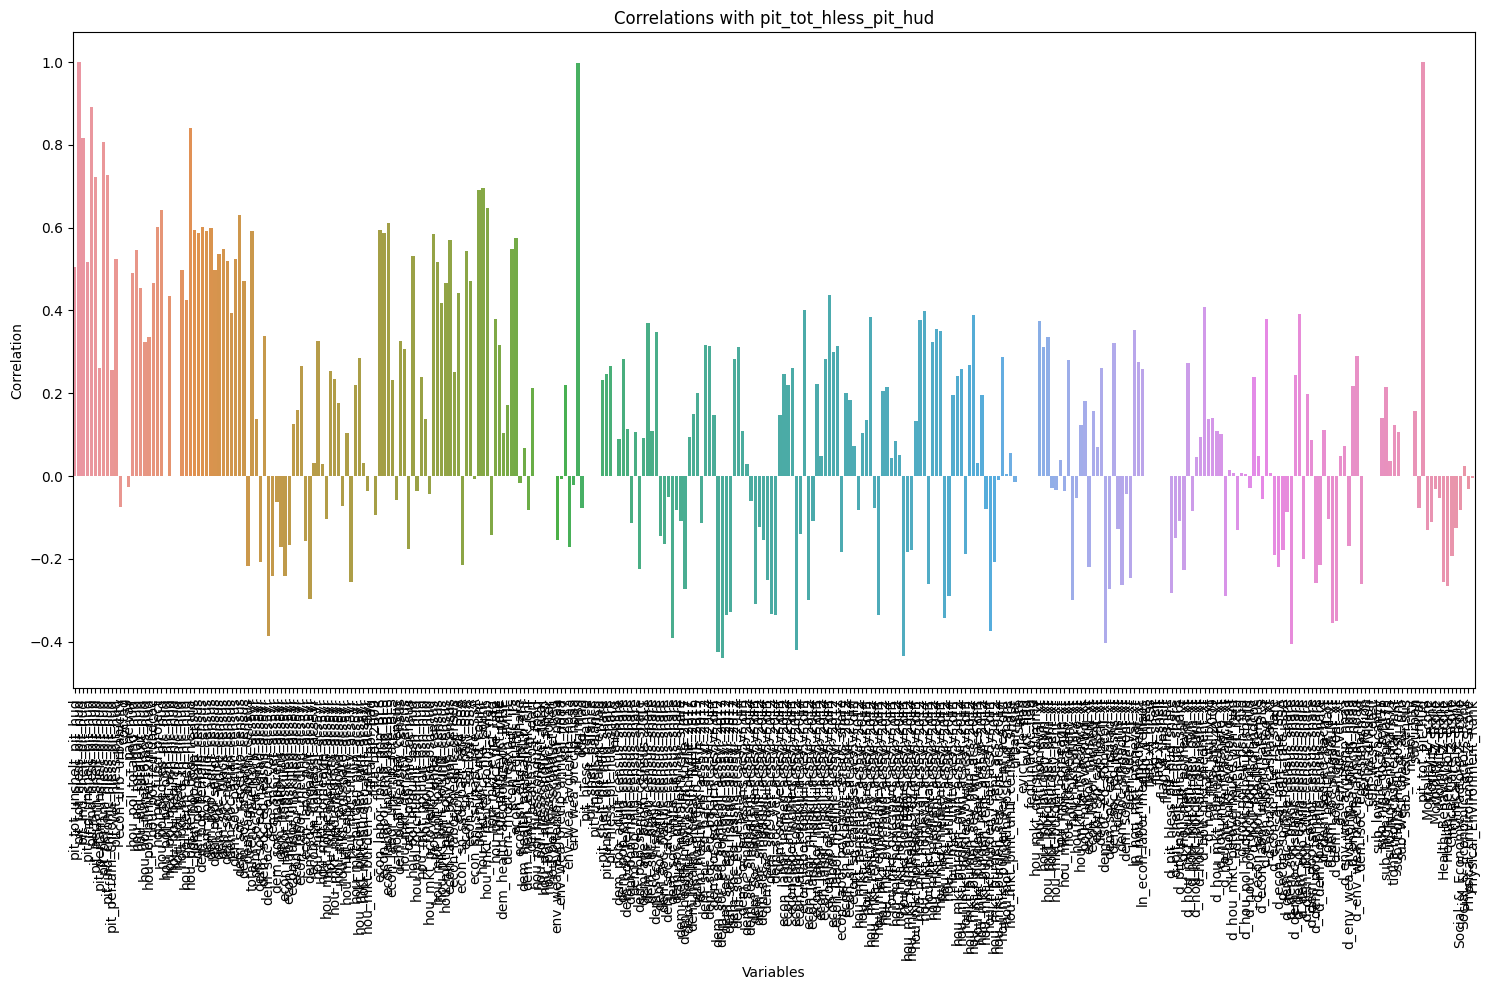

In [41]:
# use a single column (unsheltered)
specific_column = 'pit_tot_hless_pit_hud'  # Replace 'column_name' with the name of your specific column
correlations_with_specific_column = correlation_matrix[specific_column]

plt.figure(figsize=(15, 10))
sns.barplot(x=correlations_with_specific_column.index, y=correlations_with_specific_column.values)
plt.title(f'Correlations with {specific_column}')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


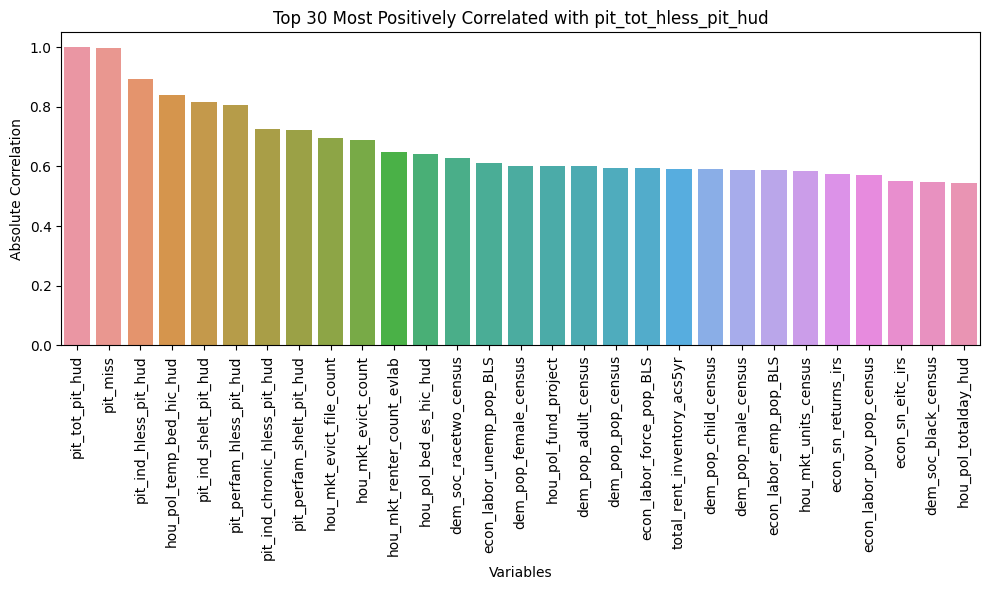

In [42]:
# positive correlations

top_pos_correlations = correlations_with_specific_column.sort_values(ascending=False).head(30)

# Remove the correlation of the specific column with itself
top_pos_correlations = top_pos_correlations[top_pos_correlations.index != specific_column]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_pos_correlations.index, y=top_pos_correlations.values)
plt.title(f'Top 30 Most Positively Correlated with {specific_column}')
plt.xlabel('Variables')
plt.ylabel('Absolute Correlation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

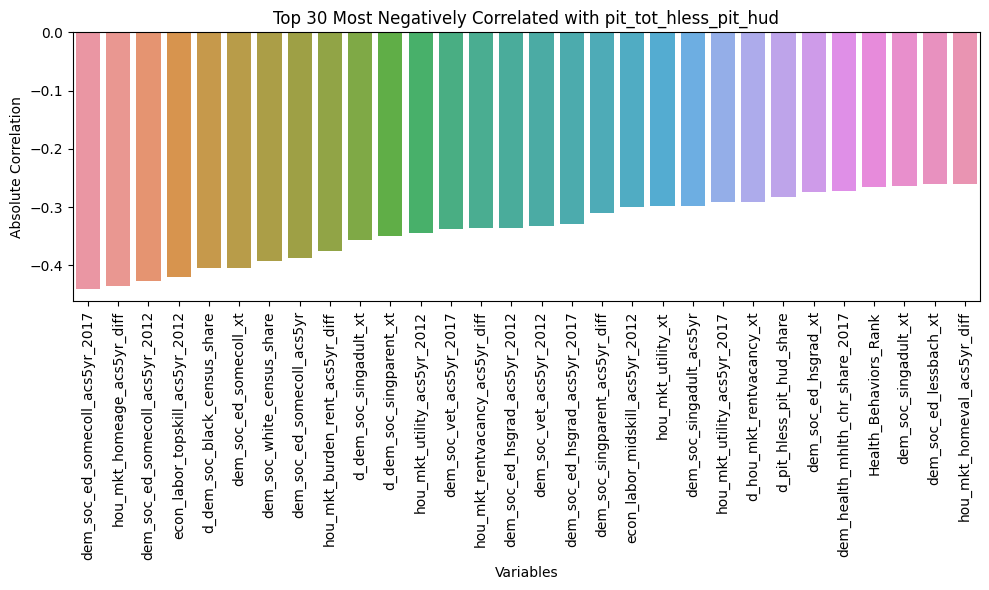

In [44]:
top_neg_correlations = correlations_with_specific_column.sort_values(ascending=True).head(30)

# Remove the correlation of the specific column with itself
top_neg_correlations = top_neg_correlations[top_neg_correlations.index != specific_column]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_neg_correlations.index, y=top_neg_correlations.values)
plt.title(f'Top 30 Most Negatively Correlated with {specific_column}')
plt.xlabel('Variables')
plt.ylabel('Absolute Correlation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()